<a href="https://colab.research.google.com/github/antahiap/dsr-nlp/blob/main/notebooks/03_gensim_lsdyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Gensim to create word embeddings.

## Dr. Tristan Behrens.

In this notebook we will use Gensim to create word embeddings from a corpus.

Word embedding are just fantastic. In a nutshell, they map words to vectors. And with vectors, as we all know, you can do math.

- [Wikipedia: Word Embedding](https://en.wikipedia.org/wiki/Word_embedding).

---

Firstly, we download the corpus. We download the entire Harry Potter collection. Feel free, to use your own corpus.

In [1]:
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%203%20-%20The%20Prisoner%20of%20Azkaban.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%204%20-%20The%20Goblet%20of%20Fire.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%205%20-%20The%20Order%20of%20the%20Phoenix.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%206%20-%20The%20Half%20Blood%20Prince.txt"
!wget -nc "https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%207%20-%20The%20Deathly%20Hallows.txt"

--2023-08-09 08:37:18--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%201%20-%20The%20Philosopher's%20Stone.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492161 (481K) [text/plain]
Saving to: ‘Book 1 - The Philosopher's Stone.txt’

Book 1 - The Philos 100%[===================>] 480.63K  --.-KB/s    in 0.01s   

2023-08-09 08:37:18 (35.6 MB/s) - ‘Book 1 - The Philosopher's Stone.txt’ saved [492161/492161]

--2023-08-09 08:37:18--  https://raw.githubusercontent.com/formcept/whiteboard/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Conn

In [2]:
!ls

"Book 1 - The Philosopher's Stone.txt"	'Book 5 - The Order of the Phoenix.txt'
'Book 2 - The Chamber of Secrets.txt'	'Book 6 - The Half Blood Prince.txt'
'Book 3 - The Prisoner of Azkaban.txt'	'Book 7 - The Deathly Hallows.txt'
'Book 4 - The Goblet of Fire.txt'	 sample_data


## Import all necessary modules.

In [3]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Train Gensim.

Here we feed all the text data into Gensim to train Word2Vec.

- [Gensim homepage](https://radimrehurek.com/gensim/).
- [Wikipedia: Word2Vec](https://en.wikipedia.org/wiki/Word2vec).

In [4]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []

        files = os.listdir(".")
        files = [file for file in files if file.endswith(".txt")]
        print(f"Found {len(files)} files")

        for file in files:
            for line in open(file):
                self.lines += [line]
        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            preprocessed_line = utils.simple_preprocess(line)
            yield preprocessed_line

In [5]:
import gensim.models

sentences = MyCorpus()

model = gensim.models.Word2Vec(
    sentences=sentences,
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")

Found 7 files
Got 211035 lines.
Done.


## Find most similar words.

With vectors it is easy to find the nearest neighbours.

Note: Feel free to experiment with your own words.

In [6]:
model.wv.most_similar("stupefy", topn=20)

[('stupidly', 0.9296680688858032),
 ('impedimental', 0.9280968308448792),
 ('finite', 0.9199769496917725),
 ('petrificus', 0.9190887808799744),
 ('totalusl', 0.9190735220909119),
 ('drooped', 0.9188054800033569),
 ('riddikulusv', 0.9159553050994873),
 ('rocking', 0.9157352447509766),
 ('sputtering', 0.913257360458374),
 ('lamplight', 0.9123160243034363),
 ('impedimenta', 0.9107815027236938),
 ('spluttering', 0.9102718830108643),
 ('churning', 0.9100597500801086),
 ('embrace', 0.9089182615280151),
 ('purring', 0.9078149199485779),
 ('expelliarmusv', 0.9061709046363831),
 ('smack', 0.905988335609436),
 ('queen', 0.9052509665489197),
 ('significantly', 0.9049091935157776),
 ('energetically', 0.9048275947570801)]

## Plot word similarities.

That was just one word. Let us generate a similarity matrix of a lot of words. Again, use your own.

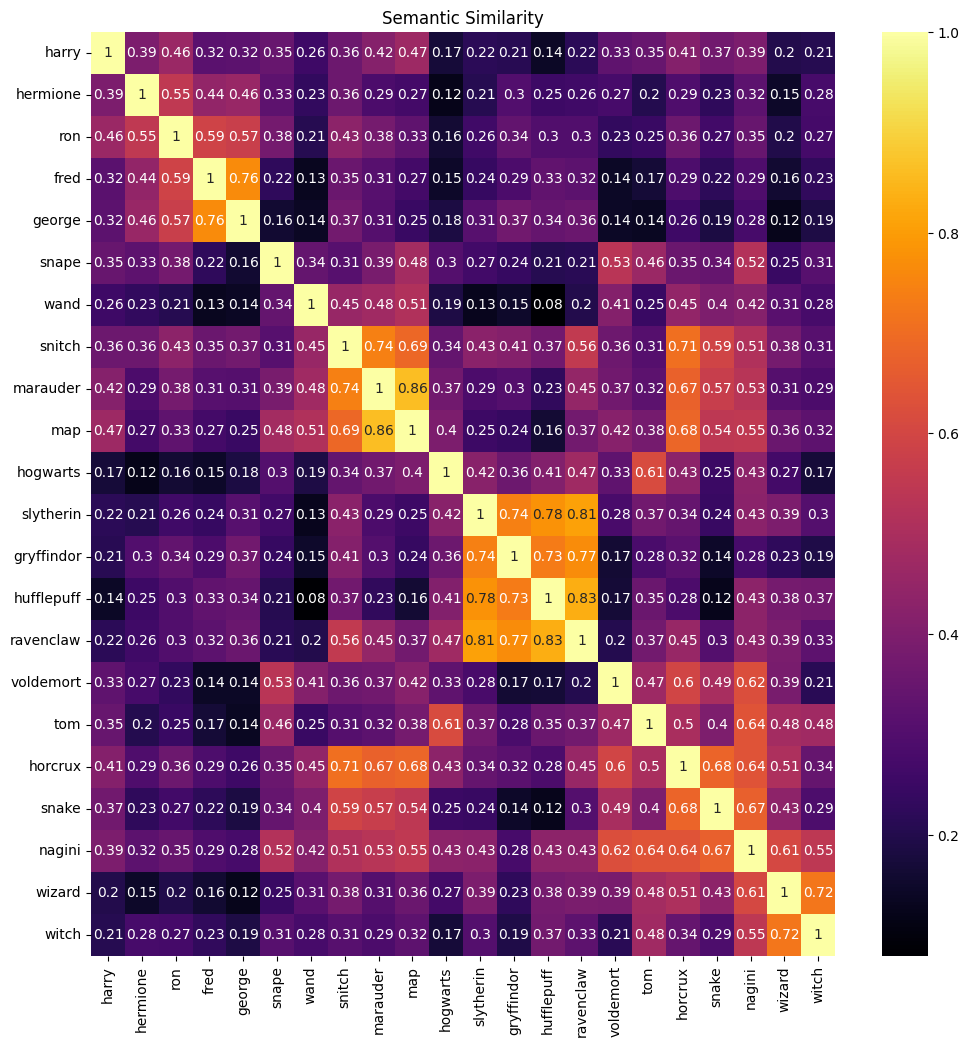

In [7]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(12, 12))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "harry",
    "hermione",
    "ron",
    "fred",
    "george",
    "snape",
    "wand",
    "snitch",
    "marauder",
    "map",
    "hogwarts",
    "slytherin",
    "gryffindor",
    "hufflepuff",
    "ravenclaw",
    "voldemort",
    "tom",
    "horcrux",
    "snake",
    "nagini",
    "wizard",
    "witch"
]
plot_similarities(words)

# Thank you!